In [ ]:
!pip3 install qiskit
!pip install crypto
!pip install Crypto
!pip install pycryptodome
!pip install pycryptodomex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 7.5 MB/s 
     |████████████████████████████████| 19.2 MB 50.0 MB/s 
     |████████████████████████████████| 240 kB 8.9 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 106 kB 23.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 943 kB 59.8 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 4.1 MB 38.0 MB/s 
     |████████████████████████████████| 1.9 MB 51.7 MB/s 
     |████████████████████████████████| 112 kB 31.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12226 sha256=550bd60697716ff038c3fa4c084f2d02627d6918334fe35a8fe5024938644873
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee55

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit import Aer
from qiskit.quantum_info import Statevector
import hashlib
import hmac
# import Cryptodome
from Crypto import Random
from Crypto.PublicKey import RSA
import base64

In [ ]:
def create_bell_pair(qc,a,b):
  qc.h(a)
  qc.cx(a,b)

In [ ]:
def alice_gates(qc,psi,a):
  qc.cx(psi,a)
  qc.h(psi)

In [ ]:
def measure_and_send(qc,a,b):
  qc.measure(0,a)
  qc.measure(1,b)

In [ ]:
def bob_gates(qc,qubit,cr1,cr2):
  qc.x(qubit).c_if(cr2,1)
  qc.z(qubit).c_if(cr1,1)

In [ ]:
# Defining registers and quantum circuit

qr=QuantumRegister(3,name="qr")
crz=ClassicalRegister(1,name='crz')
crx=ClassicalRegister(1,name='crx')
teleportation_circuit=QuantumCircuit(qr,crz,crx)



create_bell_pair(teleportation_circuit,1,2)

teleportation_circuit.barrier()

alice_gates(teleportation_circuit,0,1)

teleportation_circuit.barrier()

# teleportation_circuit.measure(0,crz)
measure_and_send(teleportation_circuit, crz,crx)
# print(c,d)

teleportation_circuit.barrier()

bob_gates(teleportation_circuit, 2,crz,crx)




# cr2.prefix
# teleportation_circuit.cregs
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐    ░           
qr_0: ───────────░───■──┤ H ├─░─┤M├────░───────────
      ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░           
qr_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────
      └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌───┐┌───┐
qr_2: ─────┤ X ├─░────────────░──╫──╫──░─┤ X ├┤ Z ├
           └───┘ ░            ░  ║  ║  ░ └─╥─┘└─╥─┘
 crz: ═══════════════════════════╩══╬══════╬════■══
                                    ║      ║   0x1 
 crx: ══════════════════════════════╩══════■═══════
                                          0x1

In [ ]:
psi=random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle="))

plot_bloch_multivector(psi)

NameError: ignored

<IPython.core.display.Latex object>

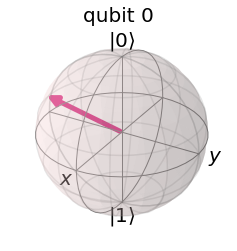

In [ ]:
psi2=random_statevector(2)
display(array_to_latex(psi2, prefix="|\\psi\\rangle="))

plot_bloch_multivector(psi2)

In [ ]:
init_gate=Initialize(psi)
init_gate.label="init"
# display(array_to_latex(init_gate, prefix="|\\psi\\rangle="))

In [ ]:
init_gate2=Initialize(psi2)
init_gate2.label="init2"

In [ ]:
qrr=QuantumRegister(3,name="qr")
# sqr=QuantumRegister(1,name="sqr")
cra=ClassicalRegister(1, name="crz")
crb=ClassicalRegister(1, name="crx")
# scr=ClassicalRegister(1,name="scr")
qc=QuantumCircuit(qrr,cra,crb)

# Step 0
# - Initialize Alice q0
qc.append(init_gate,[0])
# qc.append(init_gate2,[3])
qc.barrier()
# ans=Statevector()

# Step 1
# Create bell pair
create_bell_pair(qc,1,2)
qc.barrier()
# Step 2
# Apply Alice's Gates Operations
alice_gates(qc,0,1)
qc.barrier()
# Step 3
# Measure the qubit values and send them to Bob
measure_and_send(qc,0,1)
qc.barrier()
# Step 4
# Now apply Bob's gates based on what he has received
bob_gates(qc,2,cra,crb)

qc.draw()

┌─────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
qr_0: ┤ init(-0.84835-0.4135j,-0.2744-0.18445j) ├─░────────────░───■──┤ H ├─░─»
      └─────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
qr_1: ────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ »
qr_2: ────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                  ░      └───┘ ░            ░ »
 crz: ════════════════════════════════════════════════════════════════════════»
                                                                              »
 crx: ════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌─┐    ░           
«qr_0: ┤M├────░───────────
«      └╥┘┌─┐ ░           
«qr_1: ─╫─┤M├─░───────────
«       ║ └╥┘ ░ ┌───┐┌───┐
«qr_2: ─╫──╫──░─┤ X ├┤ Z ├
«       ║  ║  ░ └─╥─┘└─╥─┘
« crz: ═╩══╬══════╬════■══
«          ║      ║   0x1 
« crx: ════╩══════■═══════
«                0x1

Statevector([ 0.        +0.j        , -0.84835192-0.41350094j,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        , -0.27439795-0.18444986j,
             -0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


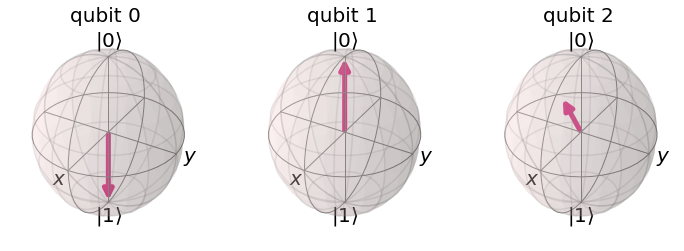

In [ ]:
sim=Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector=sim.run(qc).result().get_statevector()
print(out_vector)
# print(psi)
plot_bloch_multivector(out_vector)

In [ ]:
def convert(list):
  res=int("".join(map(str,list)))

  return res

In [ ]:
# print(out_vector)
plain1=out_vector.to_dict().values()
print(plain1)
plain2=psi.to_dict().values()
list_plain1=list(plain1)
list_plain2=list(plain2)
# print(list_plain[0])
a1=str(list_plain1[0])
a2=str(list_plain2[0])
# b=bytearray(a,"utf-8")
# b=a.encode()
byteList=[]

# for byte in b:
  # byteList.append(byte)
  # print(byte,"")
# print(convert(byteList))
# b=convert(byteList).encode()

# print(type(a))
# print(a)
# b=a.encode()
# print(b)
# digest=hashlib.pbkdf2_hmac('sha256',b'password',b'salt',10)
# print(digest.hex())
print(list_plain1)
print()
print(list_plain2)

dict_values([(-0.8483519242966115-0.4135009374472979j), (-0.2743979547068375-0.1844498569398918j)])
[(-0.8483519242966115-0.4135009374472979j), (-0.2743979547068375-0.1844498569398918j)]

[(-0.8483519242966114-0.4135009374472978j), (-0.2743979547068374-0.18444985693989183j)]


In [ ]:
# hmac implementation


statevector=out_vector.to_dict().values()
plain_list=list(statevector)
# print(plain_list)
a,b=plain_list[0], plain_list[1]
# print(a,b)
a,b=str(a),str(b)
a,b=a.encode("utf-8"),b.encode("utf-8")

digest1=hmac.new(a,b,'sha256').hexdigest()
digest2=hmac.new(a,b,'sha256').hexdigest()
digest3=hmac.new(b'password3',b'message3','sha256').hexdigest()


result1=hmac.compare_digest(digest1, digest2)
result2=hmac.compare_digest(digest1, digest3)

print(result1, result2)

True False


In [ ]:

# Python program to demonstrate
# str()
 
a = bytes("ŽString", encoding = 'utf-8')
print(a)

b'\xc5\xbdString'


In [ ]:
string = "Hello World"

# string with encoding 'utf-8'
arr = bytes(string, 'utf-8')
# arr2 = bytes(string, 'ascii')

# print(arr,'\n')

# actual bytes in the the string
for byte in arr:
    print(byte, end='')
print("\n")
# for byte in arr2:
#     print(byte, end=' ')

721011081081113287111114108100



In [ ]:
# Inspired from http://coding4streetcred.com/blog/post/Asymmetric-Encryption-Revisited-(in-PyCrypto)
# PyCrypto docs available at https://www.dlitz.net/software/pycrypto/api/2.6/


def generate_keys():
	# RSA modulus length must be a multiple of 256 and >= 1024
	modulus_length = 256*4 # use larger value in production
	privatekey = RSA.generate(modulus_length, Random.new().read)
	publickey = privatekey.publickey()
	return privatekey, publickey

def encrypt_message(a_message , publickey):
	encrypted_msg = publickey.encrypt(a_message, 32)[0]
	encoded_encrypted_msg = base64.b64encode(encrypted_msg) # base64 encoded strings are database friendly
	return encoded_encrypted_msg

def decrypt_message(encoded_encrypted_msg, privatekey):
	decoded_encrypted_msg = base64.b64decode(encoded_encrypted_msg)
	decoded_decrypted_msg = privatekey.decrypt(decoded_encrypted_msg)
	return decoded_decrypted_msg

########## BEGIN ##########

a_message = "The quick brown fox jumped over the lazy dog"


Private RSA key at 0x7FD6E044E550 Public RSA key at 0x7FD6E044E810
